In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import scipy.stats

In [2]:
la_ds = pd.read_csv('LA_Listings.csv', encoding='ISO-8859-1')
# la_ds.head()

/tmp/ipykernel_2866150/3002075121.py:1: DtypeWarning: Columns (7,12,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  la_ds = pd.read_csv('LA_Listings.csv', encoding='ISO-8859-1')


In [3]:
# Read the NY_Listings.csv
ny_ds = pd.read_csv('NY_Listings.csv', encoding='ISO-8859-1')
# ny_ds.head()

/tmp/ipykernel_2866150/2371046481.py:2: DtypeWarning: Columns (7,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  ny_ds = pd.read_csv('NY_Listings.csv', encoding='ISO-8859-1')


In [4]:
# Read the airbnb_ratings_new.csv
airbnb_ratings = pd.read_csv('airbnb_ratings_new.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
# airbnb_ratings.head()

/tmp/ipykernel_2866150/3085985135.py:2: DtypeWarning: Columns (1,3,4,5,7,9,10,11,12,14,15,19,24,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_ratings = pd.read_csv('airbnb_ratings_new.csv', encoding='ISO-8859-1')


In [5]:
airbnb_ratings_filtered = airbnb_ratings[airbnb_ratings['Country'] == 'United States']

# airbnb_ratings_filtered.head()

In [6]:
print(len(la_ds.dtypes))
print(len(ny_ds.dtypes))
print(len(airbnb_ratings_filtered.dtypes))


35
35
35


In [7]:
ny_ds.describe()

,Listing ID,Host ID,Host Response Rate,Host total listings count,latitude,longitude,Accommodates,Bathrooms,Bedrooms,Price,Minimum nights,Maximum nights,Availability 365,Number of reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
count,7.574900e+04,7.574900e+04,30631.000000,75517.000000,75749.000000,75749.000000,44310.000000,44168.000000,44310.000000,75749.000000,75749.000000,4.431000e+04,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000,75749.000000
mean,1.925819e+07,7.055025e+07,0.935596,6.317955,40.729762,-73.952705,2.813044,1.132585,1.249650,154.545750,5.922771,6.422378e+04,131.238459,16.589037,43.749066,4.312427,4.166392,4.371226,4.393761,4.243026,4.212689,1.135216
std,1.238861e+07,8.624359e+07,0.172898,31.092879,0.059889,0.168221,1.852875,0.412137,0.625075,347.382531,16.945500,1.049282e+07,137.885702,30.575433,246.049250,4.792759,4.652702,4.860567,4.871489,4.729948,4.701490,1.602724
min,2.060000e+03,7.200000e+01,0.000000,0.000000,34.078371,-118.353468,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.283741e+06,7.959444e+06,1.000000,1.000000,40.690973,-73.983672,2.000000,1.000000,1.000000,69.000000,1.000000,2.900000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,1.795766e+07,3.210761e+07,1.000000,1.000000,40.724250,-73.955703,2.000000,1.000000,1.000000,105.000000,2.000000,1.125000e+03,79.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450000
75%,2.926910e+07,1.057584e+08,1.000000,2.000000,40.763470,-73.935935,4.000000,1.000000,1.000000,175.000000,4.000000,1.125000e+03,276.000000,18.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.660000
max,4.289272e+07,3.414399e+08,1.000000,979.000000,40.911690,-73.710126,16.000000,15.500000,14.000000,10000.000000,1250.000000,2.147484e+09,365.000000,730.000000,38425.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,66.360000


In [8]:
airbnb_ratings_filtered.describe()

,Listing ID,Host ID,Host total listings count,longitude,Accommodates,Bathrooms,Bedrooms,Price,Minimum nights,Maximum nights,Availability 365,Number of reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
count,1.439540e+05,1.439540e+05,143694.000000,143954.000000,143954.000000,143559.000000,143919.000000,142681.000000,143954.000000,1.439540e+05,143954.000000,143954.000000,128436.000000,128457.000000,128346.000000,128443.000000,128344.000000,128331.000000,129057.000000
mean,1.085900e+07,3.471752e+07,9.279970,-96.039524,3.469303,1.304018,1.432903,156.117353,3.365568,1.442399e+05,162.850376,21.598420,8.316119,8.138685,8.431802,8.446369,8.221857,8.157920,1.598745
std,6.043150e+06,3.658949e+07,59.158901,20.511833,2.396692,0.679382,0.894899,137.059927,11.349196,1.708748e+07,141.994636,39.431336,3.396391,3.366966,3.432915,3.423150,3.376738,3.365283,1.926630
min,6.000000e+00,2.300000e+01,0.000000,-122.833981,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.771975e+06,5.988616e+06,1.000000,-118.339386,2.000000,1.000000,1.000000,75.000000,1.000000,3.000000e+01,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.190000
50%,1.137567e+07,2.156462e+07,1.000000,-90.085249,2.000000,1.000000,1.000000,115.000000,2.000000,1.125000e+03,134.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.900000
75%,1.614289e+07,5.059395e+07,3.000000,-73.979450,4.000000,1.500000,2.000000,189.000000,3.000000,1.125000e+03,319.000000,24.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.380000
max,2.191540e+07,1.597147e+08,1170.000000,-70.985047,21.000000,15.500000,14.000000,999.000000,1250.000000,2.147484e+09,365.000000,735.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,90.000000


In [9]:
ny_and_la = la_ds.append(ny_ds)
airbnb_dataframe = ny_and_la.append(airbnb_ratings_filtered)

airbnb_dataframe.describe()

#Now, 'df_final' has 279,568 lines of data

/tmp/ipykernel_2866150/4046365216.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ny_and_la = la_ds.append(ny_ds)
/tmp/ipykernel_2866150/4046365216.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airbnb_dataframe = ny_and_la.append(airbnb_ratings_filtered)


,Listing ID,Host ID,Host total listings count,longitude,Accommodates,Bathrooms,Bedrooms,Price,Minimum nights,Maximum nights,Availability 365,Number of reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
count,2.795680e+05,2.795680e+05,279062.000000,279568.000000,219412.000000,218779.000000,219377.000000,278295.000000,279568.000000,2.194120e+05,279568.000000,279568.000000,264050.000000,264071.000000,263960.000000,264057.000000,263958.000000,263945.000000,264671.000000
mean,1.512505e+07,5.261588e+07,8.153023,-94.827783,3.330780,1.280134,1.397348,163.031269,4.897317,1.370742e+05,159.050617,20.147277,6.142272,5.996721,6.227800,6.243073,6.074701,6.023009,1.433038
std,1.061395e+07,6.709108e+07,47.100510,21.301471,2.324432,0.662890,0.851386,323.438510,14.699783,1.663884e+07,141.206748,36.894964,4.665870,4.580377,4.727571,4.727555,4.626668,4.596277,1.849619
min,6.000000e+00,2.300000e+01,0.000000,-122.833981,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.163908e+06,7.291537e+06,1.000000,-118.330001,2.000000,1.000000,1.000000,70.000000,1.000000,3.000000e+01,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000
50%,1.391687e+07,2.643953e+07,1.000000,-87.627954,2.000000,1.000000,1.000000,110.000000,2.000000,1.125000e+03,127.000000,5.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.710000
75%,1.930944e+07,7.059022e+07,3.000000,-73.959279,4.000000,1.000000,2.000000,180.000000,3.000000,1.125000e+03,315.000000,22.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.120000
max,4.289341e+07,3.414771e+08,1170.000000,-70.985047,21.000000,15.500000,14.000000,25000.000000,1250.000000,2.147484e+09,365.000000,735.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,90.000000


In [10]:
# rows = len(airbnb_dataframe.axes[0])
# rows
airbnb_dataframe.shape

(279568, 35)

In [11]:
# airbnb_dataframe.dtypes


### Question 1: Airbnb Guests' Preferences

###### 1. Analyze and plot the number of listings based on their property type to see what people’s preferences are of renting an apartment, villa, or a house. 

Text(0, 0.5, 'Number of listings')

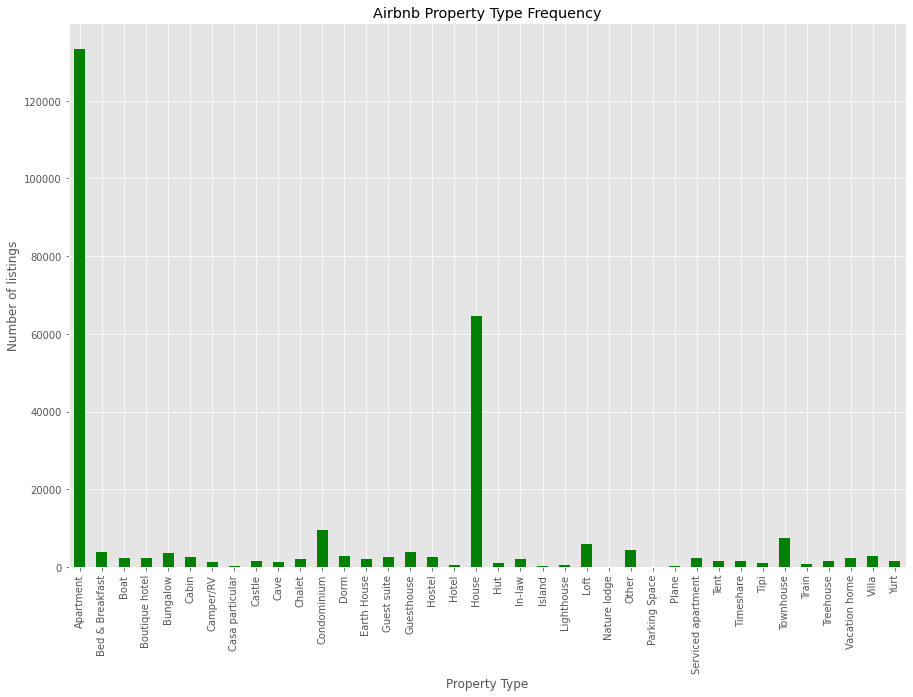

In [12]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

airbnb_dataframe = airbnb_dataframe.rename(columns={"Listing ID": "Listing_ID"})
propertytype_DF = airbnb_dataframe.groupby('Property type').Listing_ID.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'Listing_ID':'Number_Of_Listings'})

objects = propertytype_DF['Property type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='Property type',
           y='Number_Of_Listings',
           color = 'green', 
           figsize =(15,10), 
           title = 'Airbnb Property Type Frequency', 
           legend = False)
plt.xlabel('Property Type')
plt.ylabel('Number of listings')

In [13]:
#Lets include the Rooom type in addition to the property type to Analyze the prices 

room_and_Property = airbnb_dataframe.groupby(['Property type','Room type']).Price.mean()
room_and_Property = room_and_Property.reset_index()
room_and_Property = room_and_Property.sort_values('Price',ascending=[0])
room_and_Property = room_and_Property.head(10) 
#As the graph is too big for all property types, I have limited to top 10 property types

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Boutique hotel'),
  Text(1, 0, 'Train'),
  Text(2, 0, 'Timeshare'),
  Text(3, 0, 'Hut'),
  Text(4, 0, 'Hotel'),
  Text(5, 0, 'Tipi'),
  Text(6, 0, 'Castle'),
  Text(7, 0, 'Dorm'),
  Text(8, 0, 'Treehouse'),
  Text(9, 0, 'Tent')])

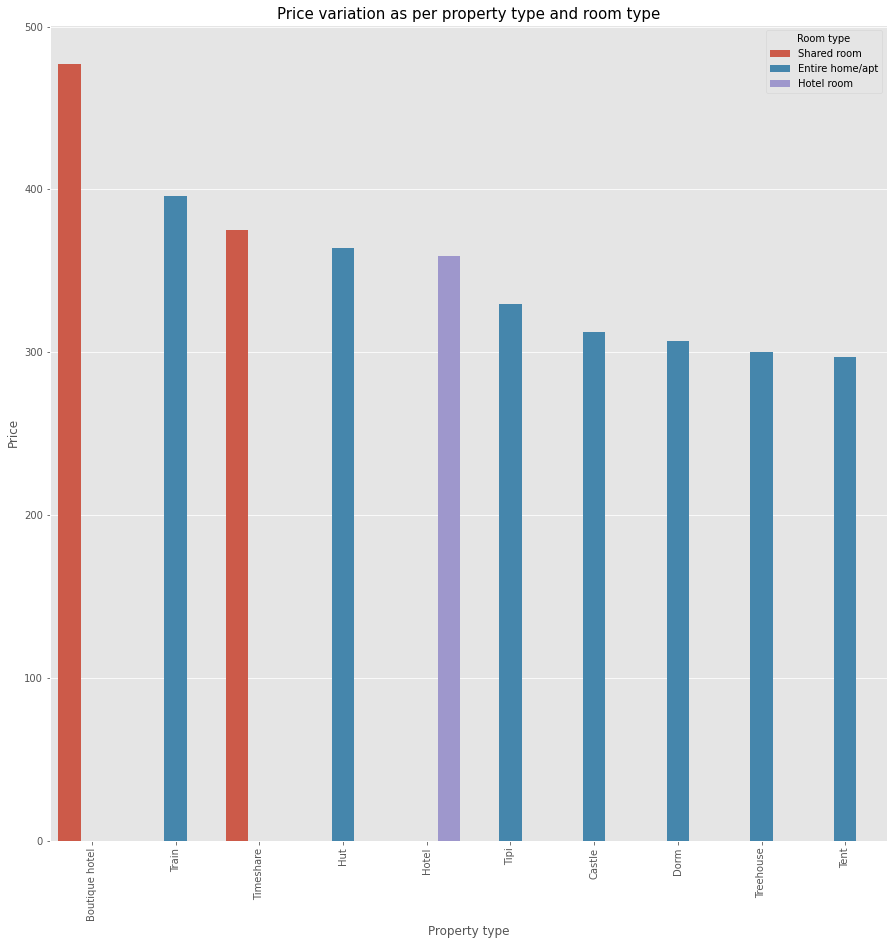

In [14]:
plt.figure(figsize=(15,15))
sns.barplot(data=room_and_Property, x="Property type", y="Price", hue="Room type")
plt.title('Price variation as per property type and room type',fontsize='15')
plt.xticks(rotation=90)
#Show only top 10

It can be seen from this graph that the most common room type is an entire home of apartment out of which a shared room in a boutique hotel had the highest price. It looks like hotel rooms are not available in many property types.

###### 2. Which rentals by location were most reviewed by Airbnb guests?

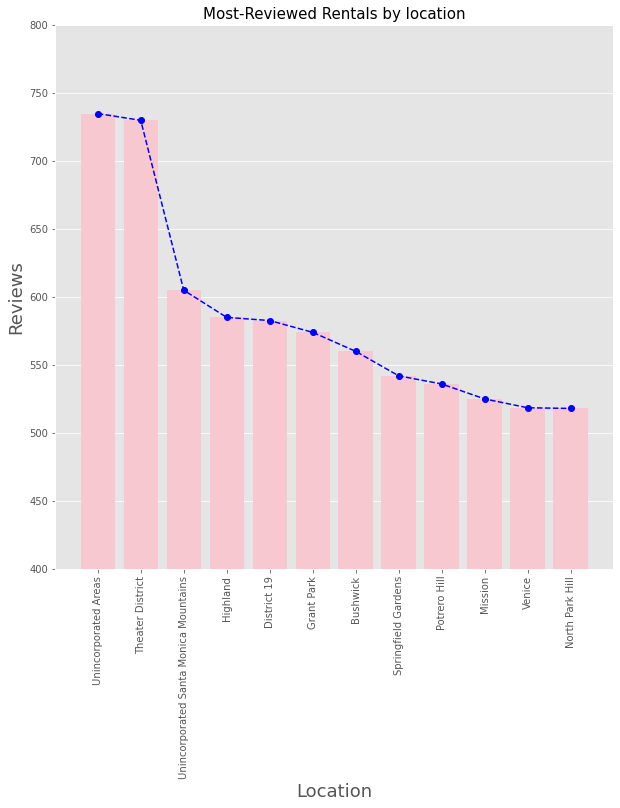

In [15]:
num_reviews = airbnb_dataframe.sort_values('Number of reviews',ascending=False)
most_reviewed = num_reviews.loc[:,['Neighbourhood cleansed','Number of reviews']][:20]
most_reviewed = most_reviewed.groupby('Neighbourhood cleansed').mean().sort_values('Number of reviews',ascending=False).reset_index()

fig4,ax3 = plt.subplots(figsize=(10,10))
sns.barplot(x=most_reviewed['Neighbourhood cleansed'],y=most_reviewed['Number of reviews'].values,color='pink',ax=ax3)
plt.plot(most_reviewed['Number of reviews'], marker='o', color='blue',linestyle='--')
plt.ylabel('Reviews', fontsize='18')
plt.xlabel('Location',fontsize='18')
plt.ylim((400,800))
for ax in ax3.get_xticklabels():
    ax.set_rotation(90)
plt.title('Most-Reviewed Rentals by location',fontsize='15')
plt.show()
sns.set()

### Question 2: Airbnb Revenue Generation

###### 1. Calculate the estimated revenue generated for each listing ID by multiplying the price of a property with the minimum nights column.  What areas are best for bringing in the most money and can be recommended to potential hosts?

In [16]:
# airbnb_dataframe.head()

In [17]:
#the estimated revenue of each booking can be obtained as the product of price and minimum nights columns
airbnb_dataframe['estimated_revenue'] = airbnb_dataframe['Price'] * airbnb_dataframe['Minimum nights']
airbnb_dataframe['estimated_revenue'].head(3) 

0     80.0
1    225.0
2     45.0
Name: estimated_revenue, dtype: float64

In [69]:
# airbnb_dataframe.head()

In [19]:
#Filter out those listings with price not equal to zero
airbnb_dataframe = airbnb_dataframe[airbnb_dataframe['Price']!=0]

In [77]:
#For each property (listing), find the estimated revenue as sum of bookings estimated revenues
estimated_revenu_df = airbnb_dataframe[['Listing_ID','estimated_revenue']].groupby(['Listing_ID']).agg(total_estimated_revenue = ('estimated_revenue','sum'), Total_guests = ('estimated_revenue', 'count'))
estimated_revenu_df.head(10)

,total_estimated_revenue,Total_guests
Listing_ID,,
6.0,1275.0,1
109.0,1708.0,2
177.0,168.0,1
344.0,336.0,2
590.0,61.0,1
686.0,140.0,1
930.0,360.0,1
941.0,1200.0,2
958.0,340.0,1


In [78]:
#Now we can merge total_revenue_per_listing_df into airbnb_dataframe
airbnb_dataframe = pd.merge(airbnb_dataframe, estimated_revenu_df, on='Listing_ID', how='left')

In [79]:
top_neighbourhoods = airbnb_dataframe[['Neighbourhood cleansed', 'total_estimated_revenue']]. \
                    groupby('Neighbourhood cleansed').mean().sort_values('total_estimated_revenue', ascending=False)

q1_top_neighbourhoods = top_neighbourhoods.head(10) 
# print(len(airbnb_dataframe['Neighbourhood cleansed'].unique()))

Text(0.5, 1.0, 'Total Estimated Revenue Density Plot for top 10 Neighborhoods')

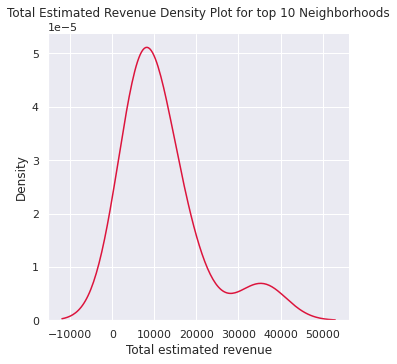

In [82]:
sns.displot(data=q1_top_neighbourhoods, x="total_estimated_revenue", kind="kde", color = 'crimson')
plt.xlabel('Total estimated revenue')
plt.ylabel('Density')
plt.title("Total Estimated Revenue Density Plot for top 10 Neighborhoods")

###### 2. Plot a bar plot to depict the distribution of the busiest months in terms of number of bookings by months and total estimated revenues generated by the hosts of various properties by months.

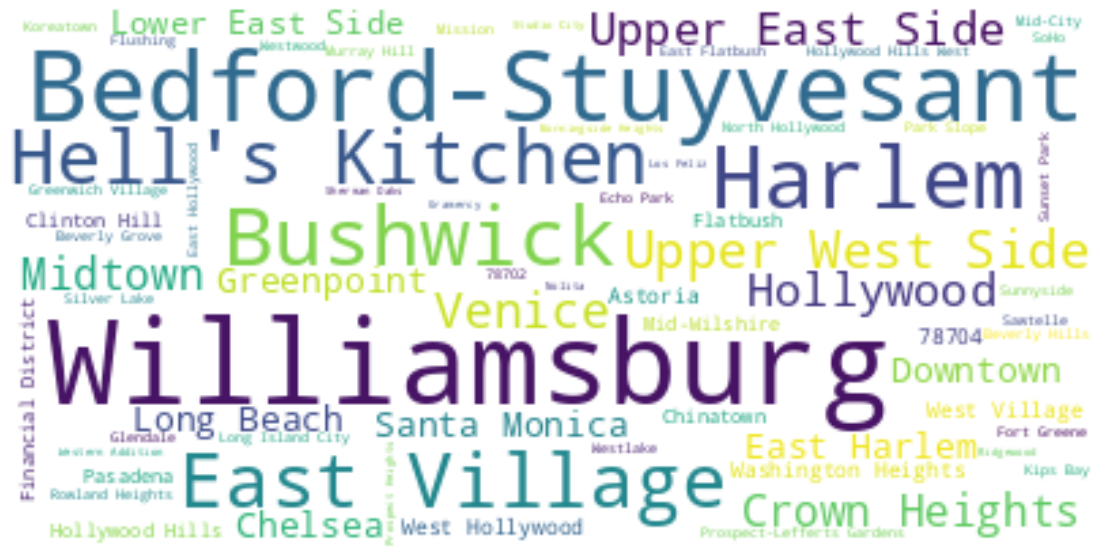

In [83]:
import wordcloud as wc
from wordcloud import WordCloud
import collections
text = airbnb_dataframe['Neighbourhood cleansed']
text = text.tolist()
tuples = collections.Counter(text)

words = WordCloud(background_color='white').generate_from_frequencies(frequencies=dict(tuples))

plt.figure(figsize=(20,10))
plt.imshow(words,interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
top_neighbourhoods = airbnb_dataframe[['Neighbourhood cleansed', 'total_estimated_revenue']]. \
                    groupby('Neighbourhood cleansed').mean().sort_values('total_estimated_revenue', ascending=False)

top_neighbourhoods.head(10) 

,total_estimated_revenue
Neighbourhood cleansed,
Rolling Hills,35503.714286
Bel-Air,17839.778761
Battery Park City,14184.970060
Palos Verdes Estates,9829.689655
Prince's Bay,8835.000000
Cheviot Hills,8586.135135
Beverly Crest,6280.901141
Tribeca,5937.175234
Fort Wadsworth,5600.000000


In [85]:
def color_map(row):
    neib = row['Neighbourhood cleansed']
    
    for i in range(n_best):
        if neib == best_neighbourhoods_for_hosts.index[i]:  
            return i+1   
        
    return 0

In [86]:
def plot_best_neighborhoods(listings_df, n_best): 
    to_plot = listings_df[['Neighbourhood cleansed', 'longitude', 'latitude']].copy()
    to_plot['color_map'] = to_plot.apply(color_map, axis='columns')
    to_plot.plot.scatter(x='longitude', y='latitude', c='color_map', colormap='jet')

In [87]:
airbnb_dataframe = airbnb_dataframe[airbnb_dataframe["latitude"].apply(lambda i: isinstance(i,float))]

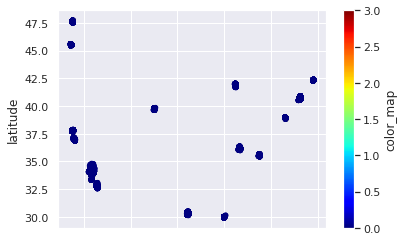

In [88]:
n_best = 3
plot_best_neighborhoods(airbnb_dataframe, n_best)

In [31]:
airbnb_dataframe['Date'] = pd.to_datetime(airbnb_dataframe['Calendar last scraped'])
airbnb_dataframe['Date'].head(3)
# airbnb_dataframe.head()

16078   2017-05-03
16079   2017-05-03
16080   2017-05-03
Name: Date, dtype: datetime64[ns]

In [32]:
bookings_by_month = airbnb_dataframe['Date'].groupby(airbnb_dataframe['Date'].dt.month).count()

Text(0.5, 1.0, 'Number of bookings by month')

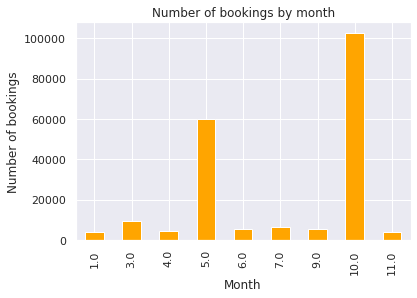

In [92]:
bookings_by_month.index.names =  ['month']
bookings_by_month.plot.bar(color = "orange")
plt.xlabel('Month')
plt.ylabel('Number of bookings')
plt.title('Number of bookings by month')

In [34]:
revenue_by_month = airbnb_dataframe[['Date','estimated_revenue']].groupby(airbnb_dataframe["Date"].dt.month).sum()
revenue_by_month


/tmp/ipykernel_2866150/3796478176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue_by_month = airbnb_dataframe[['Date','estimated_revenue']].groupby(airbnb_dataframe["Date"].dt.month).sum()


,estimated_revenue
Date,
1.0,1253834.0
3.0,5107573.0
4.0,1566137.0
5.0,30059257.0
6.0,2223941.0
7.0,3200900.0
9.0,2324390.0
10.0,58874756.0
11.0,1611725.0


Text(0.5, 1.0, 'Estimated Revenue by Month')

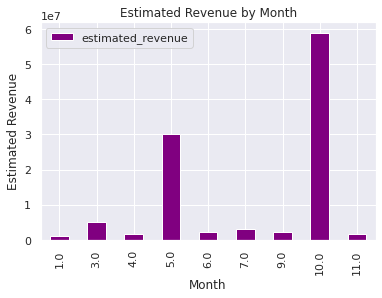

In [95]:
revenue_by_month.index.names =  ['month']
revenue_by_month.plot.bar(color = "purple")
plt.xlabel('Month')
plt.ylabel('Estimated Revenue')
plt.title('Estimated Revenue by Month')

### Question 3: Airbnb Price & Property

###### 1. The agenda is to find the variable with highest correlation with price. I will plot a pair plot of selected columns to find correlation of price of the various Airbnb’s and other factors such as bedrooms, bathrooms, review scores value, reviews per month and review scores accuracy. In addition, I will perform spearman correlation test on the data to confirm the correlation of price with one other variable having highest correlation. 

In [97]:
#After exploratory data analysis, most of the prices are in the range 0 to 500,
#bedrooms are generally less than 6, bathrooms are also generally less than 6,
#the reviews per month are less than 10, the number of reviews are below 60.

filteredData = airbnb_dataframe[(airbnb_dataframe['Bedrooms'] < 6) & (airbnb_dataframe['Bathrooms']<6) & (airbnb_dataframe['Reviews per month'] < 10) & (airbnb_dataframe['Number of reviews'] <60)]

In [98]:
filteredData.columns

Index(['Listing_ID', 'Name', 'Host ID', 'Host Name', 'Host Response Rate',
       'Host Is Superhost', 'Host total listings count', 'Street', 'City',
       'Neighbourhood cleansed', 'State', 'Country', 'latitude', 'longitude',
       'Property type', 'Room type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Amenities', 'Price', 'Minimum nights', 'Maximum nights',
       'Availability 365', 'Calendar last scraped', 'Number of reviews',
       'Last Review Date', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per month', 'estimated_revenue',
       'total_estimated_revenue_x', 'Total_guests_x', 'Date', 'Year', 'Month',
       'total_estimated_revenue_y', 'Total_guests_y',
       'total_estimated_revenue', 'Total_guests'],
      dtype='object')

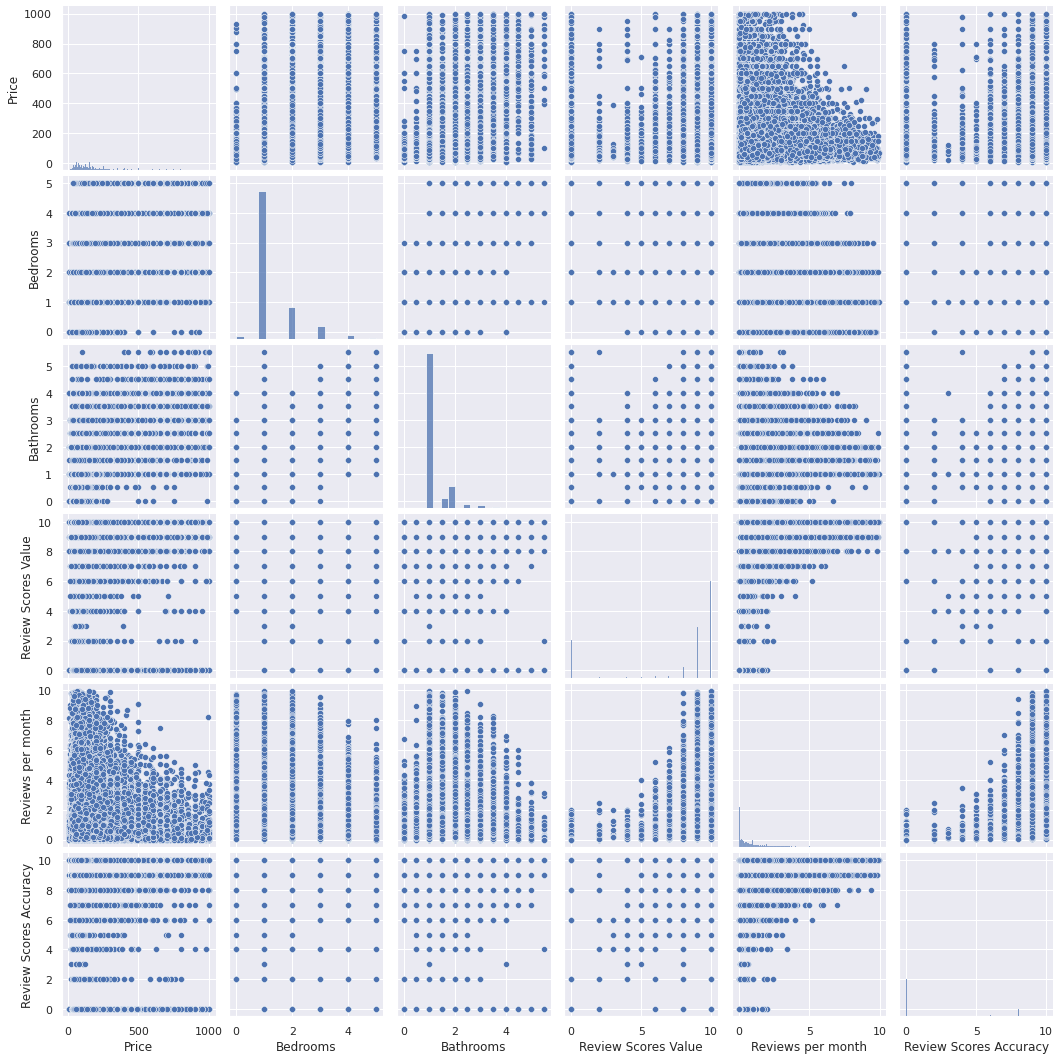

In [100]:
cols=['Price','Bedrooms','Bathrooms','Review Scores Value','Reviews per month','Review Scores Accuracy']
filteredData = filteredData[~filteredData.index.duplicated()]
sns.pairplot(filteredData[cols])
plt.show()

In [102]:
spearman_test = filteredData.corr(method='spearman')
spearman_test

/tmp/ipykernel_2866150/2103612519.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_test = filteredData.corr(method='spearman')


,Listing_ID,Host ID,Host total listings count,longitude,Accommodates,Bathrooms,Bedrooms,Price,Minimum nights,Maximum nights,Availability 365,Number of reviews,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,estimated_revenue,total_estimated_revenue_x,Total_guests_x,Year,Month,total_estimated_revenue_y,Total_guests_y,total_estimated_revenue,Total_guests
Listing_ID,1.000000,0.295949,0.009202,0.060880,0.001816,-0.047671,-0.035018,0.026144,-0.103265,0.002731,-0.050502,-0.125736,-0.048448,-0.037042,-0.067067,-0.065432,-0.012934,-0.030002,0.106072,-0.054707,-0.035671,0.070080,0.195967,0.104451,-0.037499,0.056360,-0.037499,0.056360
Host ID,0.295949,1.000000,-0.034410,0.058277,-0.005875,-0.001147,-0.015035,-0.105831,-0.171819,0.006944,0.015419,-0.112944,-0.075155,-0.055396,-0.085405,-0.096895,-0.074965,-0.044374,0.140455,-0.182149,-0.162123,0.052034,0.092888,0.016407,-0.162909,0.031677,-0.162909,0.031677
Host total listings count,0.009202,-0.034410,1.000000,-0.113570,0.096407,0.133356,0.069250,-0.062993,-0.061775,0.133876,0.312894,0.147843,0.017069,0.062755,0.046099,0.030059,0.036553,0.018204,0.156806,-0.070390,-0.094854,-0.098594,-0.046830,-0.167190,-0.104758,-0.135150,-0.104758,-0.135150
longitude,0.060880,0.058277,-0.113570,1.000000,-0.157349,-0.152142,-0.124423,-0.140862,0.091202,-0.046827,-0.197353,-0.091721,-0.094119,-0.129060,-0.101016,-0.095511,-0.171193,-0.098097,-0.100094,-0.020129,0.072292,0.325763,0.248514,0.706998,0.124670,0.488125,0.124670,0.488125
Accommodates,0.001816,-0.005875,0.096407,-0.157349,1.000000,0.394397,0.671309,0.604891,0.040009,0.071029,0.113852,0.161591,0.103498,0.133275,0.120178,0.112325,0.118424,0.085260,0.169069,0.389293,0.308095,-0.209009,-0.064999,-0.149102,0.301501,-0.197796,0.301501,-0.197796
Bathrooms,-0.047671,-0.001147,0.133356,-0.152142,0.394397,1.000000,0.530977,0.295122,0.045370,0.049702,0.095680,0.010519,0.030766,0.046062,0.033280,0.022257,0.030683,0.034448,0.012389,0.225466,0.171763,-0.144832,-0.042505,-0.152254,0.164450,-0.160575,0.164450,-0.160575
Bedrooms,-0.035018,-0.015035,0.069250,-0.124423,0.671309,0.530977,1.000000,0.517401,0.101593,0.045382,0.082155,0.046874,0.042047,0.066820,0.057334,0.046697,0.046474,0.038374,0.040322,0.392576,0.330256,-0.139517,-0.036740,-0.095012,0.324459,-0.135992,0.324459,-0.135992
Price,0.026144,-0.105831,-0.062993,-0.140862,0.604891,0.295122,0.517401,1.000000,0.134175,0.040313,0.046467,0.017431,0.045065,0.077357,0.036040,0.038287,0.133608,0.000521,-0.040837,0.691418,0.630595,-0.102773,-0.009986,0.012929,0.626024,-0.072385,0.626024,-0.072385
Minimum nights,-0.103265,-0.171819,-0.061775,0.091202,0.040009,0.045370,0.101593,0.134175,1.000000,-0.102785,-0.083085,-0.072936,-0.008116,-0.022558,-0.019326,-0.013881,-0.016135,-0.025998,-0.187426,0.775534,0.768237,0.098444,0.049833,0.149247,0.764986,0.122019,0.764986,0.122019
Maximum nights,0.002731,0.006944,0.133876,-0.046827,0.071029,0.049702,0.045382,0.040313,-0.102785,1.000000,0.106229,0.015123,-0.018420,-0.013002,-0.012543,-0.016387,0.010659,-0.020851,0.005103,-0.036653,-0.043350,-0.025560,-0.028658,-0.067355,-0.044941,-0.034407,-0.044941,-0.034407


<AxesSubplot: >

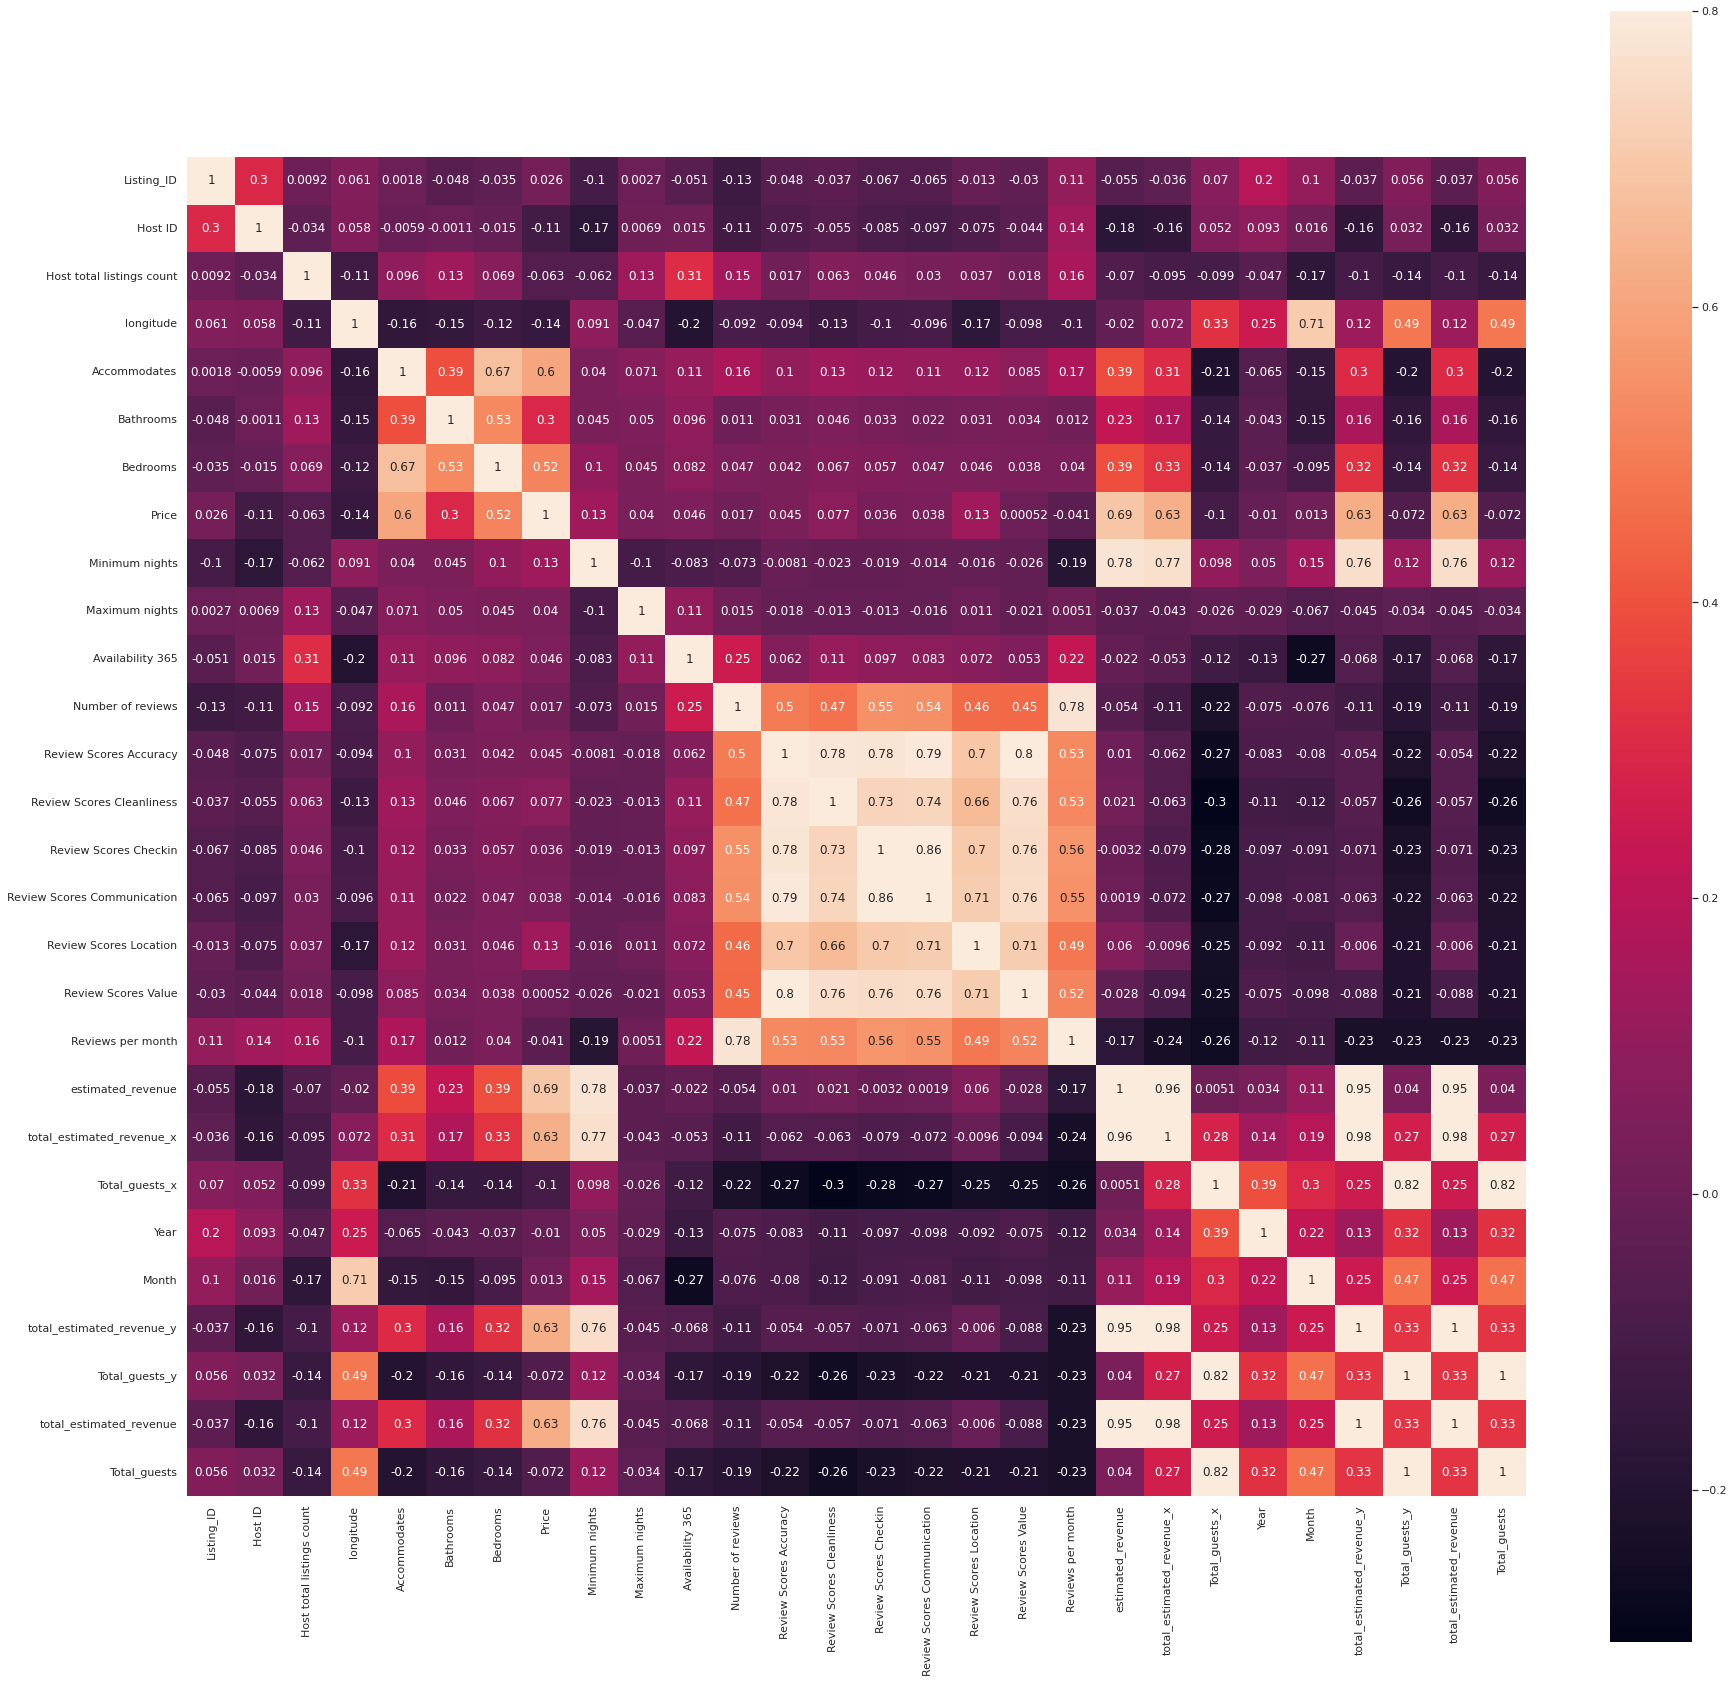

In [104]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(spearman_test, vmax=.8, square=True, annot=True)

###### 2. Fit a linear regression model to see how price changes based on the number of accommodates and see if there is any correlation between the two.

In [105]:
airbnb_dataframe['Accommodates'].describe()

count    201245.000000
mean          3.292355
std           2.251877
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max          20.000000
Name: Accommodates, dtype: float64

<AxesSubplot: >

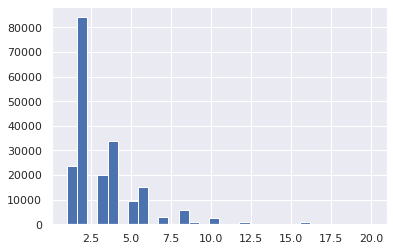

In [106]:
airbnb_dataframe['Accommodates'].hist(bins = 30)

In [107]:
acc_price = airbnb_dataframe.groupby('Accommodates', as_index=False).agg(mean_price = ('Price','mean'))
acc_price

,Accommodates,mean_price
0,1.0,75.689748
1,2.0,107.182226
2,3.0,137.361664
3,4.0,177.001630
4,5.0,214.297266
5,6.0,260.579910
6,7.0,289.824364
7,8.0,330.856141
8,9.0,325.587927
9,10.0,389.828986


In [108]:
acc_price.dropna()
acc_price = acc_price.iloc[:-1,:]

In [111]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('mean_price ~ Accommodates', data=acc_price)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             mean_price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     336.0
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           1.11e-11
Time:                        15:44:40   Log-Likelihood:                -81.038
No. Observations:                  17   AIC:                             166.1
Df Residuals:                      15   BIC:                             167.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       76.9927     15.200      5.065   

/sw/pkgs/arc/python/3.10.4/scipy/1.8.0/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


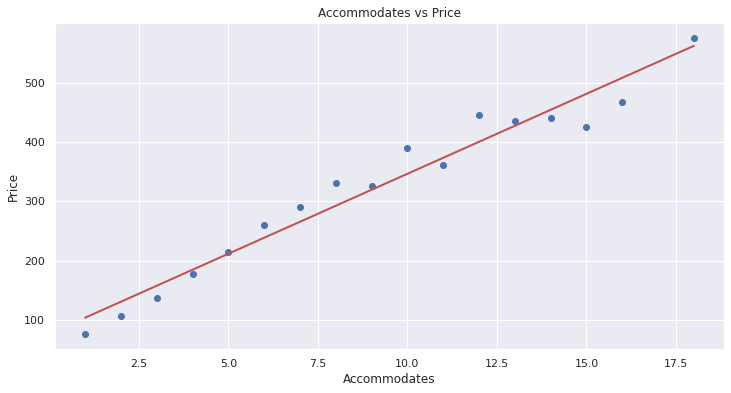

In [110]:
# Predict values
price_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(acc_price['Accommodates'], acc_price['mean_price'], 'o')           # scatter plot showing actual data
plt.plot(acc_price['Accommodates'], price_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Accommodates vs Price')

plt.show()

###### 3. I will group the properties based on property type to calculate the mean price for each property type. The aim will be to find the most expensive property type by plotting a scatterplot to observe the same.

In [112]:
select_cols = ['latitude', 'longitude', 'Property type',   
           'Review Scores Value', 'Price']
price_property = airbnb_dataframe[select_cols]
price_property.head()

,latitude,longitude,Property type,Review Scores Value,Price
0,36.922997,-121.854283,House,NaN,400.0
1,36.958248,-121.968925,Apartment,NaN,250.0
2,36.952538,-122.048587,House,10.0,65.0
3,36.995724,-121.952364,House,10.0,100.0
4,36.967989,-122.032615,House,9.0,133.0


In [113]:
# airbnb_dataframe.head()

In [114]:
price_property['Property type'].nunique()

38

In [115]:
price_property['Property type'].value_counts(normalize=True)

Apartment             0.479796
House                 0.218614
Condominium           0.034692
Townhouse             0.026635
Loft                  0.021382
Other                 0.015334
Guesthouse            0.013987
Bed & Breakfast       0.013868
Bungalow              0.012606
Dorm                  0.010069
Villa                 0.010000
Cabin                 0.009855
Hostel                0.009507
Guest suite           0.009430
Boutique hotel        0.008803
Boat                  0.008776
Serviced apartment    0.008344
Vacation home         0.008279
Chalet                0.008130
Earth House           0.008126
In-law                0.007433
Yurt                  0.006022
Tent                  0.005980
Timeshare             0.005846
Treehouse             0.005635
Castle                0.005574
Camper/RV             0.004809
Cave                  0.004775
Hut                   0.003665
Tipi                  0.003382
Train                 0.002456
Hotel                 0.002181
Lighthou

In [116]:
price_property['Property type'].value_counts(normalize=True)[:8].sum().round(2)
top8 = list(price_property['Property type'].value_counts(normalize=True)[:8].index)
top8

['Apartment',
 'House',
 'Condominium',
 'Townhouse',
 'Loft',
 'Other',
 'Guesthouse',
 'Bed & Breakfast']

In [117]:
price_property['Property type'] = [x if x in top8 else 'Other' for x in   
                        price_property['Property type']]

/tmp/ipykernel_2866150/3978491852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_property['Property type'] = [x if x in top8 else 'Other' for x in


In [118]:
prop_price_agg = df_sub[['Property type','Price']].groupby('Property type')\
  .agg(['mean','count'])\
    .sort_values(by=('Price','mean'), ascending=False).round(2)
prop_price_agg.reset_index()

Property type   Price        
                      mean   count
0            Other  207.13   49860
1      Condominium  190.67    9005
2             Loft  185.49    5574
3        Townhouse  179.72    6927
4            House  173.07   56329
5  Bed & Breakfast  170.56    3621
6       Guesthouse  160.85    3655
7        Apartment  142.36  125159

In [119]:
price_colnames = list(prop_price_agg.columns)


Text(0.5, 1.0, 'Mean price of listings of top 8 property types')

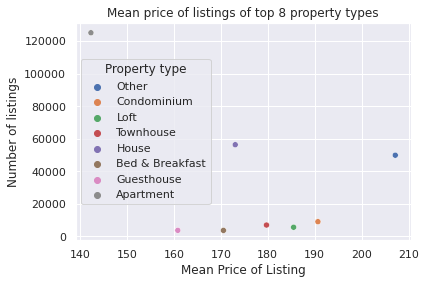

In [122]:
sns.scatterplot(data=prop_price_agg, x=price_colnames[0], y=price_colnames[1], hue="Property type")
plt.xlabel('Mean Price of Listing')
plt.ylabel('Number of listings')
plt.title('Mean price of listings of top 8 property types')


### Question 4: Reviews by Airbnb Guests
1. In which year (2015, 2016 or 2017) were there the greatest average number of reviews for all the listings and to see the trend in these three years if the number of reviews provided by customers has increased over time? 

In [124]:
airbnb_dataframe['Year'] = airbnb_dataframe['Date'].dt.year

In [125]:
airbnb_dataframe['Month'] = airbnb_dataframe['Date'].dt.month

In [126]:
airbnb_dataframe = airbnb_dataframe.sort_values(by = 'Date').reset_index(drop = True)


In [127]:
airbnb_timeseries = airbnb_dataframe.groupby(['Date', 'Month', 'Year']).agg({'Listing_ID': 'count'}).reset_index()

In [128]:
airbnb_timeseries.rename(columns = {'Listing_ID': 'total_reviews'}, inplace = True)

In [129]:
# Checking if all months are present in every year
airbnb_timeseries.groupby('Year').Month.count()

Year
2015.0     4
2016.0     8
2017.0    13
Name: Month, dtype: int64

In [130]:
airbnb_timeseries.set_index('Date', inplace = True)

Text(0.5, 1.0, 'Time series plot of total number of reviews as per date')

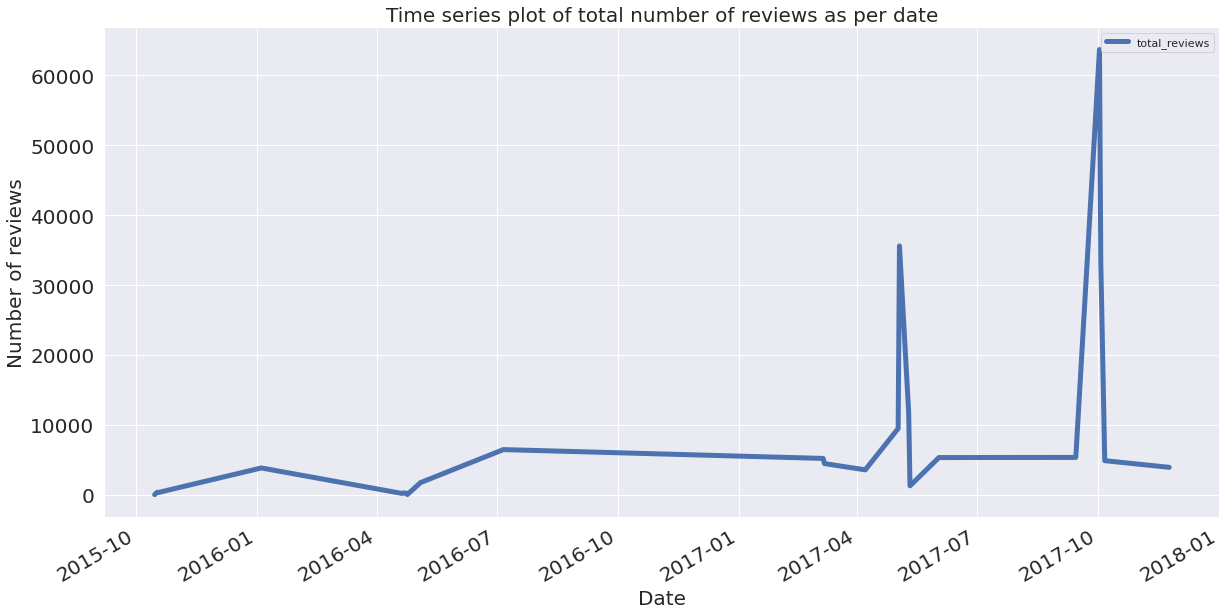

In [132]:
#Plotting time series. Total_reviews vs date
airbnb_timeseries.plot(y = 'total_reviews', linewidth = 5, fontsize = 20, figsize = (20,10))
plt.ylabel('Number of reviews', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.title('Time series plot of total number of reviews as per date', fontsize = 20)